## Задание 1. Устойчивость по Ляпунову

Один из ключевых вопросов, возникающих при изучении дифференциальных уравнений, заключается в следующем: как изменяется решение при малом изменении начального условия? При этом особый интерес представляет не мгновенное поведение системы, а её динамика при $t \to \infty$. На примере рассмотренных ранее пружинных маятников можно было наблюдать различные фазовые траектории, к которым решения стремятся с течением времени: устойчивые (при затухающих колебаниях) или неустойчивые (например, при колебаниях, вызванных внешними воздействиями). Далее введем соответствующие формальные определения.

Рассмотрим случай одномерного фазового пространства. Пусть есть уравнение следующего вида.

$$
\dot{x} = x^2 - 1.
$$

Указанное уравнение автономное, поскольку независимая переменная $t$ отсутствует в правой части уравнения и его правая часть зависит только от искомой функции.

Рассмотрим численные решения для различных начальных условий.

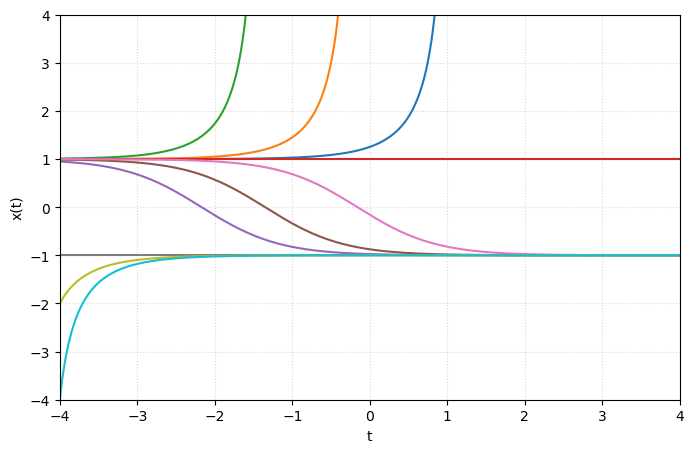

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, x):
    return x**2 - 1

t_span = [-4, 4]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# начальные условия для разных кривых
x0_list = [1.0001, 1.001, 1.01, 1, 0.95, 0.99, 0.999, -1, -2, -4]

plt.figure(figsize=(8, 5))

for x0 in x0_list:
    sol = solve_ivp(f, t_span, [x0], t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], lw=1.5)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

На рисунке можно наблюдать, что всего имеется пять типов фазовых кривых и две особые точки.  

Особые точки (равновесные состояния) определяются как точки, в которых \(\dot{x} = 0\), то есть:

$$
x^2 - 1 = 0 \quad \Rightarrow \quad x = \pm 1.
$$

В одномерном случае для определения типа равновесной точки удобно использовать производную правой части уравнения по $x$: $f'(x) = 2x$ и анализировать её знак:
* Если $f'(x^*) < 0$, то точка является **устойчивым равновесием** (решения сходятся к точке).  
* Если $f'(x^*) > 0$, то точка является **неустойчивым равновесием** (решения расходятся от точки).

Например, для двух точек:
* $x^* = -1$: $f'(-1) = -2 < 0 \Rightarrow$ устойчивое равновесие.  
* $x^* = 1$: $f'(1) = 2 > 0 \Rightarrow$ неустойчивое равновесие.

Рассмотрим фазовый портрет следующего вида:

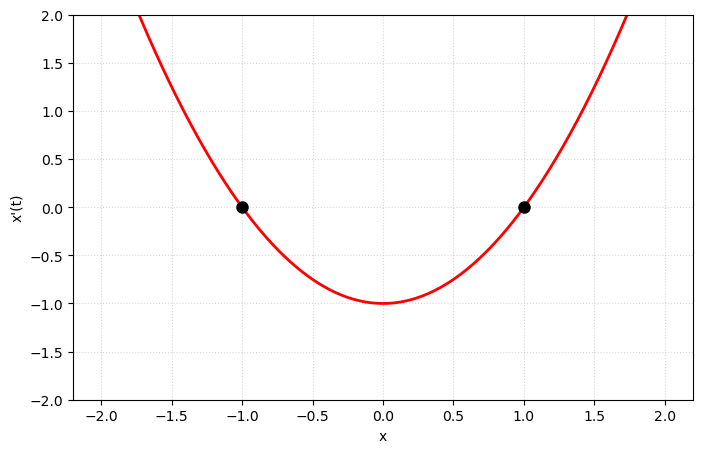

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# функция правой части
def f(x):
    return x**2 - 1

x_vals = np.linspace(-2, 2, 400)
dx = f(x_vals)

plt.figure(figsize=(8, 5))

plt.plot(x_vals, dx, 'r', lw=2)

# точки
equilibria = [-1, 1]
for eq in equilibria:
    plt.plot(eq, 0, 'ko', markersize=8)

plt.xlabel('x')
plt.ylabel("x'(t)")
plt.grid(True, linestyle=':', alpha=0.5)
plt.ylim(-2, 2)
plt.show()

Точка $-1$ является **устойчивым равновесием**. Это означает, что если начальное условие слегка отклоняется от этой точки или подвергается небольшому случайному воздействию, то решение не расходится далеко от равновесного состояния. Более того, со временем оно будет стремиться вернуться к этому положению равновесия.

Напротив, точка $1$ является **неустойчивым равновесием**. Даже при очень малом отклонении от этой точки решение со временем может значительно удалиться: либо в положительном направлении, стремясь к бесконечности, либо в отрицательном, притягиваясь к устойчивому равновесию $-1$. Таким образом, любое малое возмущение вблизи точки $1$ приводит к значительным изменениям в поведении системы.

Убедимся в этом, добавив поле направлений.

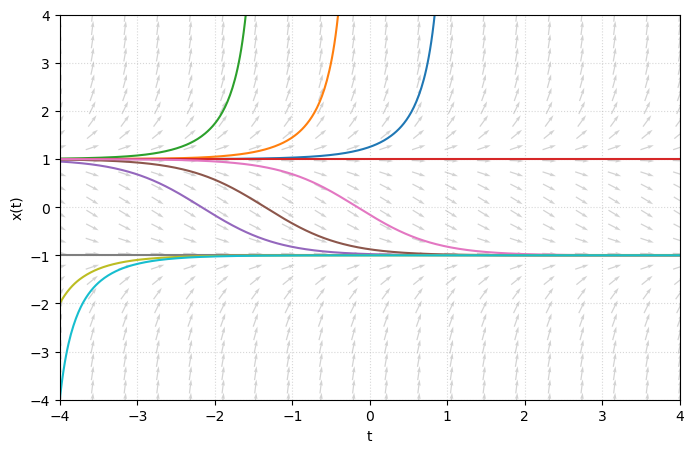

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, x):
    return x**2 - 1

t_span = [-4, 4]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# начальные условия для разных кривых
x0_list = [1.0001, 1.001, 1.01, 1, 0.95, 0.99, 0.999, -1, -2, -4]

plt.figure(figsize=(8, 5))

# векторное поле
x_vals = np.linspace(-4, 4, 30)
t_vals = np.linspace(-4, 4, 20)
T, X = np.meshgrid(t_vals, x_vals)
U = np.ones_like(T)           # стрелки вдоль оси времени
V = f(0, X)                   # скорость вдоль x
N = np.sqrt(U**2 + V**2)      # нормируем длину стрелок
plt.quiver(T, X, U/N, V/N, angles='xy', pivot='mid', color='lightgray', width=0.002)

# интегральные кривые
for x0 in x0_list:
    sol = solve_ivp(f, t_span, [x0], t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], lw=1.5)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

Пусть задана система дифференциальных уравнений

$$
\frac{dx_i}{dt} = f_i(x_1, x_2, \ldots, x_n, t), \quad i = 1, 2, \ldots, n. \tag{1}
$$

Решение $\varphi_i(t)$, $i = 1, 2, \ldots, n$, системы (1), удовлетворяющее начальным условиям $\varphi_i(t_0) = \varphi_{i0}$, $i = 1, 2, \ldots, n$, называется **устойчивым по Ляпунову** при $t \to \infty$, если для любого $\varepsilon > 0$ существует $\delta(\varepsilon) > 0$ такое, что для всякого решения $x_i(t)$, $i = 1, 2, \ldots, n$, системы (1), начальные значения которого удовлетворяют условиям

$$
|x_i(t_0) - \varphi_{i0}| < \delta,\quad i = 1, 2, \ldots, n, \tag{2}
$$

имеют место неравенства

$$
|x_i(t) - \varphi_i(t)| < \varepsilon,\quad i = 1, 2, \ldots, n, \tag{3}
$$

для всех $t \ge t_0$.

Если при сколь угодно малом $\delta > 0$ хотя бы для одного решения $x_i(t)$, $i = 1, 2, \ldots, n$, неравенства (3) не выполняются, то решение $\varphi_i(t)$ называется **неустойчивым**.

Если кроме выполнения неравенств (3) при условии (2) выполняется также условие

$$
\lim_{t \to \infty} |x_i(t) - \varphi_i(t)| = 0,\quad i = 1, 2, \ldots, n, \tag{4}
$$

то решение $\varphi_i(t)$, $i = 1, 2, \ldots, n$, называется  
**асимптотически устойчивым**.

Исследование на устойчивость решения $\varphi_i(t)$, $i = 1, 2, \ldots, n$, системы (1) можно свести к исследованию на устойчивость нулевого (тривиального) решения $x_i \equiv 0$, $i = 1, 2, \ldots, n$, некоторой системы, аналогичной системе (1):

$$
\frac{dx_i}{dt} = F_i(x_1, x_2, \ldots, x_n, t),\quad i = 1, 2, \ldots, n,
$$

где $F_i(0, 0, \ldots, 0, t) \equiv 0$, $i = 1, 2, \ldots, n$. Говорят, что точка $x_i = 0$, $i = 1, 2, \ldots, n$, есть **точка покоя** системы. Применительно к точке покоя определения устойчивости и неустойчивости могут быть сформулированы следующим образом.

Точка покоя $x_i = 0$, $i = 1, 2, \ldots, n$, устойчиво по Ляпунову, если, каково бы ни было $\varepsilon > 0$, можно найти такое $\delta > 0$, что для любого решения $x_i(t)$, $i = 1, 2, \ldots, n$, начальные данные которого $x_{i0} = x_i(t_0)$, $i = 1, 2, \ldots, n$, удовлетворяют условию

$$
|x_{i0}| < \delta,\quad i = 1, 2, \ldots, n, 
$$

выполняются неравенства

$$
|x_i(t)| < \varepsilon,\quad i = 1, 2, \ldots, n, 
$$

для всех $t \ge t_0$.

Для случая $n = 2$ геометрически это означает следующее. Каким бы малым ни был радиус $\varepsilon$ цилиндра с осью $Ot$, в плоскости $t = t_0$ найдётся $\delta$-окрестность точки $(0,0,t_0)$ такая, что все интегральные кривые

$$
x_1 = x_1(t), \qquad x_2 = x_2(t),
$$

выходящие из этой окрестности, для всех $t \ge t_0$ будут оставаться внутри этого цилиндра. 

Если кроме выполнения неравенств (3) выполняется также условие

$$
\lim_{t \to +\infty} |x_i(t)| = 0,\quad i = 1, 2, \ldots, n,
$$

то устойчивость асимптотическая.

Точка покоя $x_i = 0$, $i = 1, 2, \ldots, n$, неустойчива, если при сколь угодно  
малом $\delta > 0$ хотя бы для одного решения $x_i(t)$, $i = 1, 2, \ldots, n$, условие (3') не выполняется.

---

**Пример 1.**  
Исходя из определения устойчивости по Ляпунову, исследовать на устойчивость решение уравнения

$$
\frac{dx}{dt} = 1 + t - x, \tag{5}
$$

удовлетворяющее начальному условию

$$
x(0) = 0.
$$

**Решение.**  
Уравнение (5) есть линейное неоднородное уравнение. Его общее решение $x(t) = Ce^{-t} + t$. Начальному условию $x(0) = 0$ удовлетворяет решение

$$
\varphi(t) = t. \tag{6}
$$

Начальному условию $x(0) = x_0$ удовлетворяет решение

$$
x(t) = x_0 e^{-t} + t. \tag{7}
$$

Рассмотрим разность решений (7) и (6) уравнения (5) и запишем её так:

$$
x(t) - \varphi(t) = x_0 e^{-t} + t - t = (x_0 - 0)e^{-t}.
$$

Отсюда видно, что для всякого $\varepsilon > 0$ существует $\delta > 0$ (например,  
$\delta = \varepsilon$) такое, что для всякого решения $x(t)$ уравнения (5), начальные  
значения которого удовлетворяют условию $|x_0 - 0| < \delta$, выполняется неравенство

$$
|x(t) - \varphi(t)| = |x_0 - 0| e^{-t} < \varepsilon
$$

для всех $t \ge 0$. Следовательно, решение $\varphi(t) = t$ является устойчивым. Более того, поскольку

$$
\lim_{t \to +\infty} |x(t) - \varphi(t)| = \lim_{t \to +\infty} |x_0 - 0| e^{-t} = 0,
$$

решение $\varphi(t) = t$ является асимптотически устойчивым.  
Это решение $\varphi(t)$ является неограниченным при $t \to +\infty$.

Приведённый пример показывает, что из устойчивости решения дифференциального уравнения не следует ограниченности решения.

---

**Пример 2.**  
Исследовать на устойчивость решение уравнения

$$
\frac{dx}{dt} = \sin^2 x. \tag{8}
$$

**Решение.**  
Оно имеет очевидные решения

$$
x = k\pi,\qquad k = 0, \pm 1, \pm 2, \ldots \tag{9}
$$

Интегрируем уравнение (8):

$$
\cot x = C - t,\quad \text{или}\quad \cot x = \cot x_0 - t,
$$

откуда

$$
x = \operatorname{arccot}(\cot x_0 - t),\qquad x \ne k\pi. \tag{10}
$$

Все решения (9) и (10) ограничены на $(-\infty, +\infty)$.  
Однако решение $x(t) \equiv 0$ неустойчиво при $t \to +\infty$,  
так как при любом $x_0 \in (0, \pi)$ имеем

$$
\lim_{t \to +\infty} x(t) = \pi
$$

Следовательно, из ограниченности решений дифференциального уравнения, вообще говоря,  
не следует их устойчивости. Это явление характерно для нелинейных уравнений и систем.

---


**Задание 1.1**. Для уравнения найти положения равновесия и исследовать их на устойчивость.

Варианты заданий:

1. $\dot{x} = \sin{x} - x$
2. $\dot{x} = -x \sin^2 t$
3. $\dot{x} = x \sin^3 t$
4. $\dot{x} = -x \sin^2 x$

**Задание 1.2**. Исходя из определения устойчивости по Ляпунову, исследовать на устойчивость решение уравнения.

Варианты заданий:

1. $\dot{x} = -x + t^2, \ x(1)=1$
2. $\dot{x} = x + t, \ x(0)=1$
3. $\dot{x} = 2 + t, \ x(0)=1$
4. $\dot{x} = 2t(x+1), \ x(0)=0$

## Задание 2. Простейшие типы точек покоя

Рассмотрим систему двух линейных однородных дифференциальных уравнений с постоянными коэффициентами

$$
\begin{cases}
\dfrac{dx}{dt} = a_{11} x + a_{12} y, \\
\dfrac{dy}{dt} = a_{21} x + a_{22} y,
\end{cases} \tag{1}
$$

причем $\Delta \neq 0$. Такого рода системы (с правой частью, не зависящей явным образом от $t$) называются автономными. Другое название: стационарная система дифференциальных уравнений.

Точка $x = 0$, $y = 0$, в которой правые части уравнений системы (1) обращаются в ноль, называются точкой покоя системы (1). Для исследования точки покоя системы (1) надо составить характеристическое уранвение и найти его корни $\lambda_{1}$ и $\lambda_{2}$.

Возможны следующие случаи.

* Корни $\lambda_{1}$, $\lambda_{2}$ вещественные и разные:
    1. $\lambda_{1} < 0$, $\lambda_{2} < 0$. Точка покоя асимптотически устойчива (устойчивый узел).
    2. $\lambda_{1} > 0$, $\lambda_{2} > 0$. Точка покоя неустойчева (неустойчивый узел).
    3. $\lambda_{1} \lambda_{2} < 0$. Точка покоя неустойчева (седло).
* Корни $\lambda_{1} = \lambda_{2}$ кратные:
    1. $\lambda_{1} = \lambda_{2} < 0$. Точка покоя асимптотически устойчива (устойчивый узел).
    2. $\lambda_{1} = \lambda_{2} > 0$. Точка покоя неустойчива (неустойчивый узел).
* Корни комплексные $\lambda_{1} = \alpha + i\beta$, $\lambda_{2} = \alpha - i\beta$:
    1. $\alpha < 0$, $\beta \neq 0$. Точка покоя асимптотически устойчива (устойчивый фокус).
    2. $\alpha > 0$, $\beta \neq 0$. Точка покоя неустойчива (неустойчивый фокус).
    3. $\alpha = 0$, $\beta \neq 0$. Точка покоя устойчива (центр).

В случае визуализации векторного поля вводят понятие особой точки — точки, в которой векторное поле обращается в нуль. Для линейной автономной системы с постоянными коэффициентами стационарной точкой (её также называют точкой равновесия или точкой покоя) является точка ($x_0$, $y_0$), в которой правая часть системы равна нулю:

$$\displaystyle a_{11} x_0 + a_{12} y_0 = 0, \qquad a_{21} x_0 + a_{22} y_0 = 0.$$

Для линейных двумерных автономных систем точка равновесия может быть одного из четырёх типов: узел, седло, фокус или центр.

Выполним визуализацию, демонстрирующую различные типы особых точек.

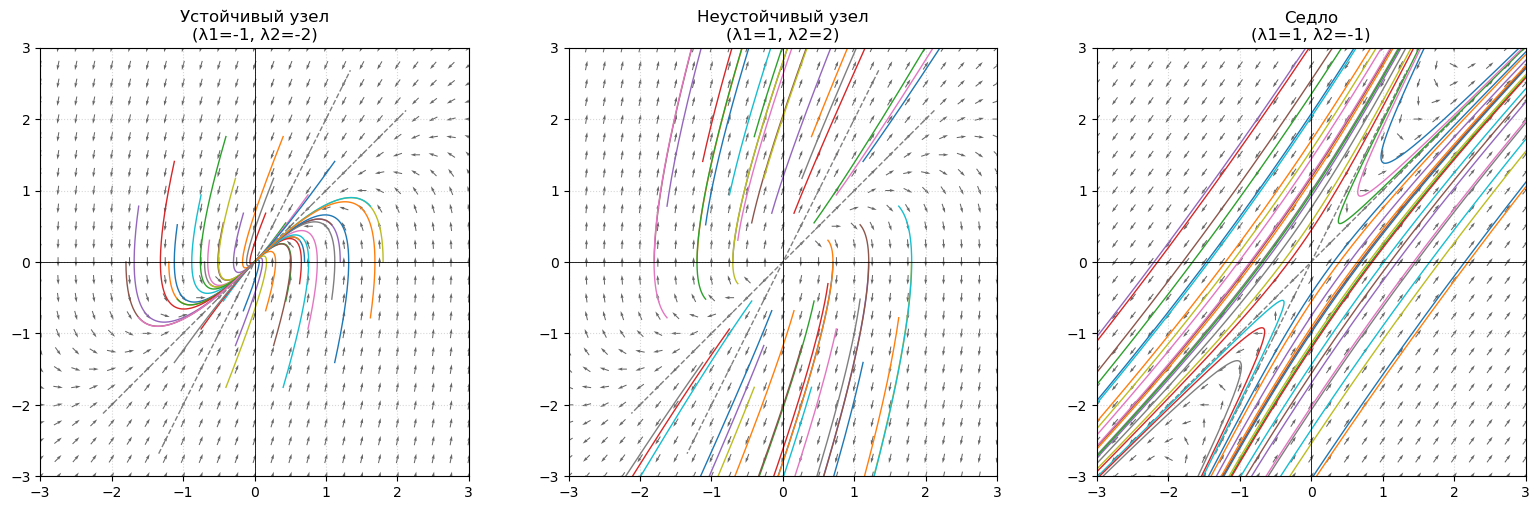

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def make_A_from_eigs(eigs, V):
    Lambda = np.diag(eigs)
    return V @ Lambda @ np.linalg.inv(V)

def trajectory(V, eigs, X0, t):
    Vinv = np.linalg.inv(V)
    coeffs = Vinv @ X0
    exp_terms = np.exp(np.outer(eigs, t))
    scaled = coeffs[:,None] * exp_terms
    Xt = V @ scaled
    return Xt.T

V = np.array([[1.0, 1.0],
              [1.0, 2.0]])

cases = {
    "Устойчивый узел\n(λ1=-1, λ2=-2)":  np.array([-1.0, -2.0]),
    "Неустойчивый узел\n(λ1=1, λ2=2)":  np.array([1.0, 2.0]),
    "Седло\n(λ1=1, λ2=-1)":             np.array([1.0, -1.0])
}

xmin, xmax, ymin, ymax = -3, 3, -3, 3
Y, X = np.mgrid[ymin:ymax:25j, xmin:xmax:25j]
pts = np.stack([X.ravel(), Y.ravel()])

t_fwd  = np.linspace(0,   5, 600)
t_both = np.linspace(-5,  5, 900)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, (title, eigs) in zip(axes, cases.items()):
    A = make_A_from_eigs(eigs, V)

    # поле направлений
    U = (A @ pts).reshape(2, *X.shape)
    Ux, Uy = U[0], U[1]
    speed = np.sqrt(Ux**2 + Uy**2)
    ax.quiver(X, Y, Ux/(speed+1e-8), Uy/(speed+1e-8),
              angles='xy', pivot='mid', alpha=0.6)

    # собственные направления
    eigvals, eigvecs = np.linalg.eig(A)
    for i in range(2):
        vec = eigvecs[:, i]
        line = np.linspace(-3, 3, 80)
        ax.plot(line * vec[0], line * vec[1], '--', lw=1.0, color='gray')

    # начальные условия по окружностям
    thetas = np.linspace(0, 2*np.pi, 14, endpoint=False)
    inits = []
    for r in [0.7, 1.2, 1.8]:
        for th in thetas:
            inits.append([r*np.cos(th), r*np.sin(th)])

    # траектории
    for X0 in inits:
        X0 = np.array(X0)
        t = t_both if 'Седло' in title else t_fwd
        Xt = trajectory(V, eigs, X0, t)
        ax.plot(Xt[:, 0], Xt[:, 1], lw=1.0)

    ax.set_title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect('equal', 'box')
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.axhline(0, color='black', lw=0.6)
    ax.axvline(0, color='black', lw=0.6)

plt.tight_layout()
plt.show()

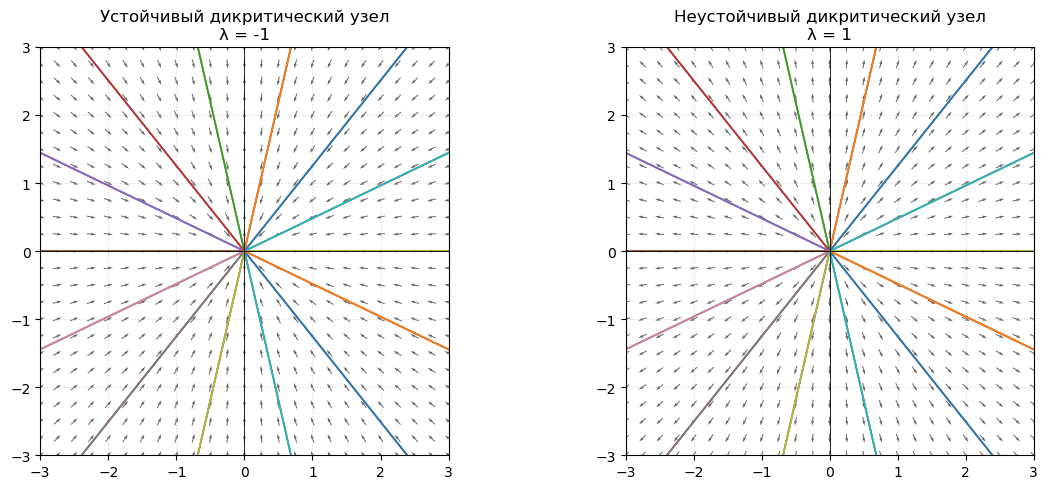

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def A_radial(lam):
    return np.array([[lam, 0],
                     [0,   lam]])

def trajectory_radial(lam, X0, t):
    factor = np.exp(lam * t)
    Xt = factor[:, None] * X0[None, :]
    return Xt

cases = {
    "Устойчивый дикритический узел\nλ = -1": A_radial(-1),
    "Неустойчивый дикритический узел\nλ = 1": A_radial(1),
}

xmin, xmax, ymin, ymax = -3, 3, -3, 3
Y, X = np.mgrid[ymin:ymax:25j, xmin:xmax:25j]
pts = np.stack([X.ravel(), Y.ravel()])

t = np.linspace(-5, 5, 500)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (title, A) in zip(axes, cases.items()):
    lam = A[0,0]

    # поле направлений
    U = (A @ pts).reshape(2, *X.shape)
    Ux, Uy = U[0], U[1]
    speed = np.sqrt(Ux**2 + Uy**2)
    ax.quiver(X, Y, Ux/(speed+1e-8), Uy/(speed+1e-8),
              angles='xy', pivot='mid', alpha=0.6)

    # начальные условия
    thetas = np.linspace(0, 2*np.pi, 14, endpoint=False)
    radii = [0.8, 1.5, 2.2]
    inits = []
    for r in radii:
        for th in thetas:
            inits.append([r*np.cos(th), r*np.sin(th)])

    for X0 in inits:
        X0 = np.array(X0)
        Xt = trajectory_radial(lam, X0, t)
        ax.plot(Xt[:, 0], Xt[:, 1], lw=1.2)

    ax.set_title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect("equal", "box")
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.axhline(0, color='black', lw=0.6)
    ax.axvline(0, color='black', lw=0.6)

plt.tight_layout()
plt.show()

Когда собственные значения матрицы совпадают, возможны два принципиально разных случая, определяемых **геометрической кратностью собственного значения** (количеством линейно независимых собственных векторов).

1. **Дикритический узел**  

Этот случай возникает, когда геометрическая кратность равна алгебраической, то есть существует два линейно независимых собственных вектора. В двумерном пространстве это эквивалентно тому, что матрица системы пропорциональна единичной ($A = \lambda I$). Фазовый портрет представляет собой семейство прямых, проходящих через начало координат. Любой ненулевой вектор является собственным. Направление движения определяется знаком собственного значения $\lambda$: при $\lambda > 0$ движение происходит от особой точки (неустойчивый дикритический узел), при $\lambda < 0$ — к особой точке (устойчивый дикритический узел).

2. **Вырожденный узел (жорданов узел)**

Этот случай возникает, когда геометрическая кратность равна 1, то есть существует только один (с точностью до умножения на число) собственный вектор. Матрица системы в этом случае приводима к жордановой форме с одной клеткой размера $2\times2$ (с ненулевым элементом над диагональю). Фазовый портрет характеризуется наличием единственной прямой, определяемой собственным вектором, к которой все остальные траектории касаются вблизи начала координат. Направление движения также определяется знаком $\lambda$: при $\lambda > 0$ движение от особой точки (неустойчивый жорданов узел), при $\lambda < 0$ — к особой точке (устойчивый жорданов узел).  

Для определения того, с какой стороны от собственной прямой траектории приближаются к ней или удаляются, удобно вычислить вектор скорости в какой-либо точке, не лежащей на собственной прямой. Это позволяет однозначно определить направление движения по всем траекториям.


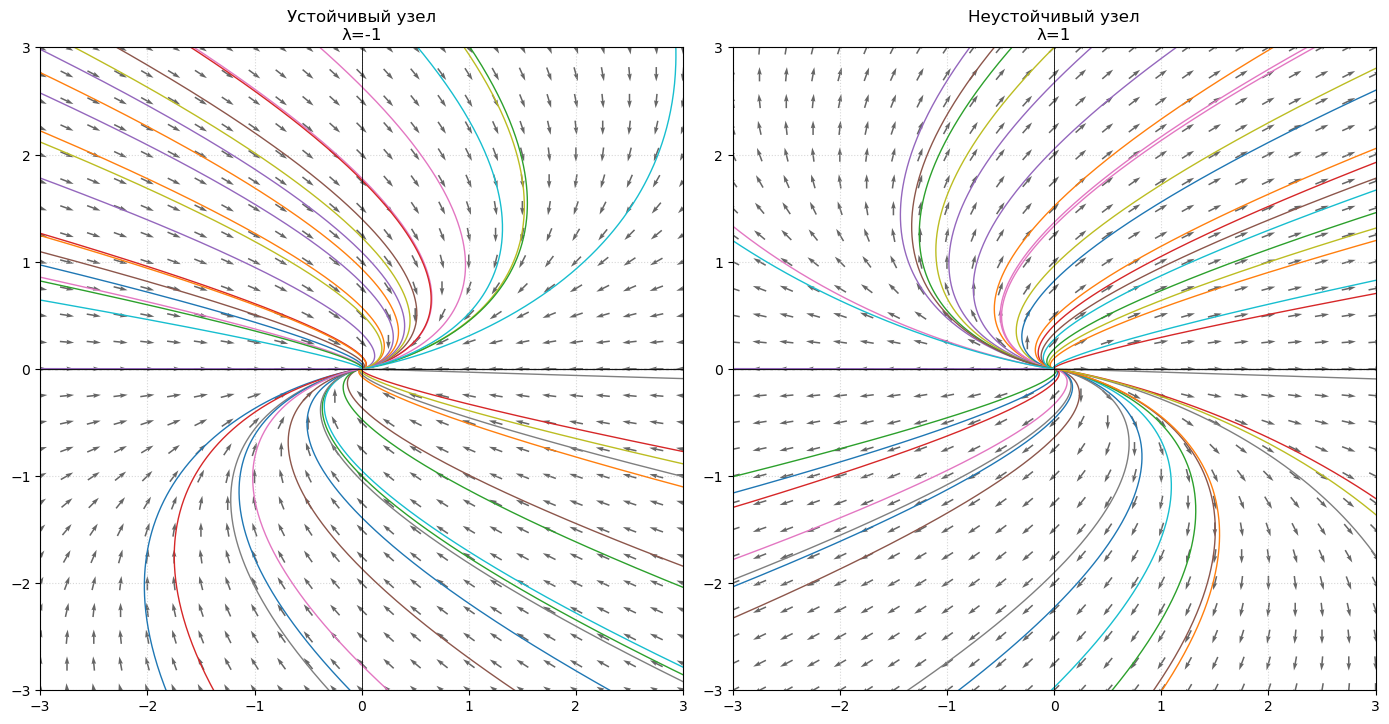

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def make_A_diag(eigs):
    return np.diag(eigs)

def make_A_jordan(lam):
    return np.array([[lam, 1],
                     [0,   lam]])

def trajectory(A, X0, t):
    w, V = np.linalg.eig(A)
    Vinv = np.linalg.inv(V)
    coeffs = Vinv @ X0
    exp_terms = np.exp(np.outer(w, t))
    Xt = V @ (coeffs[:, None] * exp_terms)
    return Xt.T

def trajectory_jordan(lam, X0, t):
    x0, y0 = X0
    e = np.exp(lam * t)
    x = e * (x0 + t * y0)
    y = e * y0
    return np.vstack([x, y]).T

cases = {

    "Устойчивый узел\nλ=-1":
        ("jordan", make_A_jordan(-1)),

    "Неустойчивый узел\nλ=1":
        ("jordan", make_A_jordan(1))
}

xmin, xmax, ymin, ymax = -3, 3, -3, 3

Y, X = np.mgrid[ymin:ymax:25j, xmin:xmax:25j]
pts = np.stack([X.ravel(), Y.ravel()])

t_fwd  = np.linspace(0,   5, 600)
t_both = np.linspace(-5,  5, 900)

fig, axes = plt.subplots(1, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, (title, (ctype, A)) in zip(axes, cases.items()):
    U = (A @ pts).reshape(2, *X.shape)
    Ux, Uy = U[0], U[1]
    speed = np.sqrt(Ux**2 + Uy**2)
    ax.quiver(X, Y, Ux/(speed+1e-8), Uy/(speed+1e-8),
              angles="xy", pivot="mid", alpha=0.6)

    eigvals, eigvecs = np.linalg.eig(A)
    for i in range(2):
        vec = eigvecs[:, i]
        line = np.linspace(-3, 3, 80)
        ax.plot(line * vec[0], line * vec[1], '--', lw=1.0, color='gray')

    rng = np.random.default_rng(0)
    r = 2 * np.sqrt(rng.random(40))
    theta = 2 * np.pi * rng.random(40)
    inits = np.vstack([r * np.cos(theta), r * np.sin(theta)]).T

    for X0 in inits:
        if ctype == "diag":
            Xt = trajectory(A, X0, t_fwd)
        else:
            lam = eigvals[0]
            Xt = trajectory_jordan(lam, X0, t_both)
        ax.plot(Xt[:, 0], Xt[:, 1], lw=1.0)

    ax.set_title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect("equal", "box")
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.axhline(0, color='black', lw=0.6)
    ax.axvline(0, color='black', lw=0.6)

plt.tight_layout()
plt.show()


Визуализация для случая комплексных корней.

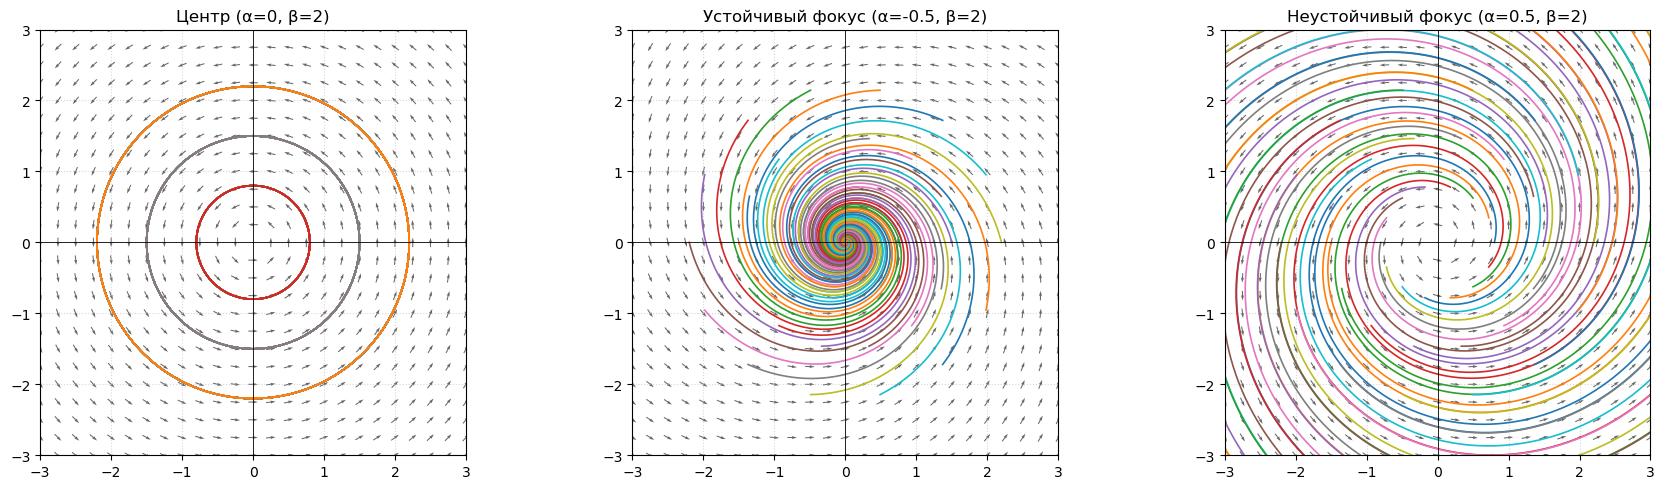

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def make_A_complex(alpha, beta):
    """Матрица с комплексными собственными числами α ± i β"""
    return np.array([[alpha, -beta],
                     [beta,  alpha]])

def trajectory_complex(A, X0, t):
    # аналитическое решение: X(t) = exp(A t) X0
    w, V = np.linalg.eig(A)
    Vinv = np.linalg.inv(V)
    coeffs = Vinv @ X0
    exp_terms = np.exp(np.outer(w, t))
    Xt = V @ (coeffs[:, None] * exp_terms)
    return Xt.T.real  # берем реальную часть

cases = {
    "Центр (α=0, β=2)": make_A_complex(0, 2),
    "Устойчивый фокус (α=-0.5, β=2)": make_A_complex(-0.5, 2),
    "Неустойчивый фокус (α=0.5, β=2)": make_A_complex(0.5, 2),
}

xmin, xmax, ymin, ymax = -3, 3, -3, 3
Y, X = np.mgrid[ymin:ymax:25j, xmin:xmax:25j]
pts = np.stack([X.ravel(), Y.ravel()])

t = np.linspace(0, 10, 600)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, A) in zip(axes, cases.items()):
    # поле направлений
    U = (A @ pts).reshape(2, *X.shape)
    Ux, Uy = U[0], U[1]
    speed = np.sqrt(Ux**2 + Uy**2)
    ax.quiver(X, Y, Ux/(speed+1e-8), Uy/(speed+1e-8),
              angles='xy', pivot='mid', alpha=0.6)
    
    # начальные условия
    thetas = np.linspace(0, 2*np.pi, 14, endpoint=False)
    radii = [0.8, 1.5, 2.2]
    inits = []
    for r in radii:
        for th in thetas:
            inits.append([r*np.cos(th), r*np.sin(th)])

    # траектории
    for X0 in inits:
        Xt = trajectory_complex(A, X0, t)
        ax.plot(Xt[:, 0], Xt[:, 1], lw=1.2)

    # оформление
    ax.set_title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect("equal", "box")
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.axhline(0, color='black', lw=0.6)
    ax.axvline(0, color='black', lw=0.6)

plt.tight_layout()
plt.show()

**Задание 2.1**.

В задании требуется исследовать линейную систему уравнений и ответить на следующие вопросы:
1. Для каких значений параметра $a \in \displaystyle \mathbb{R}$ нулевое решение является асимптотически устойчивым, а для каких — просто устойчивым.
2. Для каких значений параметра $a \in \displaystyle \mathbb{R}$ особая точка является седлом, узлом или фокусом.
3. Для указанного значения $a$ выполнить визуализацию фазового портрета.

Варианты заданий:

1.
$$
\left\{
\begin{aligned}
\dot{x} &= x + ay,\\
\dot{y} &= ax + y
\end{aligned}
\right.
\qquad a = \frac{1}{2}.
$$

2.
$$
\begin{cases}
\dot{x} = ax + y,\\
\dot{y} = ay - (2a+1)x;
\end{cases}
\qquad a = 1.
$$

3.
$$
\begin{cases}
\dot{x} = x + (2-a)y,\\
\dot{y} = ax - 3y;
\end{cases}
\qquad a = 4.
$$

4.
$$
\begin{cases}
\dot{x} = 2ax + y,\\
\dot{y} = ay - 2ax;
\end{cases}
\qquad a = 1.
$$
